Begin by importing necessary libraries. We will use tensorflow for the algorithms, pyaudio to handle parsing of live audio, and matplotlib to create visuals.

In [1]:
import tensorflow as tf 
import pyaudio
import matplotlib.pyplot as plt
import matplotlib
import IPython
import struct
import numpy as np
import librosa
import librosa.display


Option 1: Real Time Audio Capture & Waveform Visualizer

In [2]:
matplotlib.use('TkAgg') # using tkinter for visualization <3

CHUNK = 1024 * 4  # 4096 samples per chunk
FORMAT = pyaudio.paInt16
CHANNELS = 1  # mono sound because only one mic
RATE = 44100 #standard rate 44.1 khz

In [3]:
p = pyaudio.PyAudio()

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True, #initialize as true
    output=True, #initialize as true
    frames_per_buffer=CHUNK
)

In [4]:
# create the plot
fig, ax = plt.subplots()
plt.ion()  # interactive mode on
x = np.arange(0, 2 * CHUNK)  # x values should match the length of data_int
line, = ax.plot(x, np.random.rand(2 * CHUNK))

In [5]:
# set y-axis limits to fit 16-bit audio
ax.set_ylim(-2000, 2000)
ax.set_xlim(0, 2 * CHUNK)

(0.0, 8192.0)

In [6]:
# set plot labels and title
ax.set_title("Real-Time Audio Waveform")
ax.set_xlabel("Sample Index")
ax.set_ylabel("Amplitude")

Text(17.972222222222214, 0.5, 'Amplitude')

In [7]:
try:
    while True:
        # read the audio data
        data = stream.read(CHUNK * 2)

        # unpack the data into 16-bit integers and center it around zero
        data_int = np.array(struct.unpack(str(2 * CHUNK) + 'h', data), dtype='int16')

        # update the line plot with new data
        line.set_ydata(data_int)

        # draw and flush the plot
        fig.canvas.draw()
        fig.canvas.flush_events()
        plt.pause(0.01)  # Small pause to give GUI time to update
except KeyboardInterrupt:
    print("Stream stopped by user.")
    stream.stop_stream()
    stream.close()
    p.terminate()

Stream stopped by user.


Option 2: User-Uploaded Files

Sample Rate: 44100
Audio Data: [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -9.304419e-14 -9.690668e-14
 -8.942789e-14]


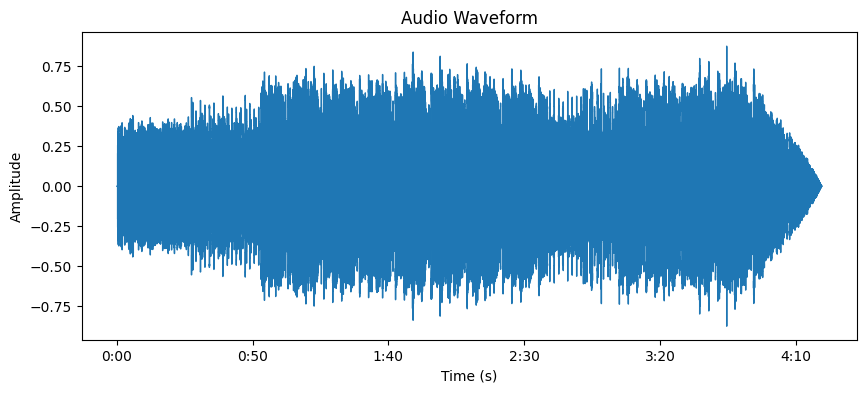

In [2]:
# use librosa for audio files, whereas pyaudio is used for real-time audio streams
test_audio = 'C:\\Users\\adith\\OneDrive\\Desktop\\vs code xoxo\\personal\\Oracle\\oracle_venv\\fresh-clone\\california_world.mp3'

#load in the file: 

audio_data, sample_rate = librosa.load(test_audio, sr=None)

#print to check: 

print(f'Sample Rate: {sample_rate}')
print(f'Audio Data: {audio_data}')


#plot waveform for funzies: 

plt.figure(figsize=(10,4))
librosa.display.waveshow(audio_data, sr=sample_rate)
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()